In [3]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:

# re-size all the images to this
IMAGE_SIZE = [256,256]

# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False
  

# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(18, activation='softmax')(x)


# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [5]:


# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_data_dir="/content/drive/MyDrive/FYP2Dataset/"

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256,256),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data

test_set = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(256,256),
    batch_size=8,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1186 images belonging to 18 classes.
Found 295 images belonging to 18 classes.


In [9]:

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
149/149 [==============================] - 377s 2s/step - loss: 14.7814 - accuracy: 0.1374 - val_loss: 7.1594 - val_accuracy: 0.2169
Epoch 2/15
149/149 [==============================] - 33s 225ms/step - loss: 8.8720 - accuracy: 0.2487 - val_loss: 7.1246 - val_accuracy: 0.2881
Epoch 3/15
149/149 [==============================] - 34s 226ms/step - loss: 9.7163 - accuracy: 0.2681 - val_loss: 9.8280 - val_accuracy: 0.2271
Epoch 4/15
149/149 [==============================] - 33s 225ms/step - loss: 10.1159 - accuracy: 0.2808 - val_loss: 10.0800 - val_accuracy: 0.3424
Epoch 5/15
149/149 [==============================] - 33s 225ms/step - loss: 7.3115 - accuracy: 0.3609 - val_loss: 10.8608 - val_accuracy: 0.2407
Epoch 6/15
149/149 [==============================] - 33s 224ms/step - loss: 7.9857 - accuracy: 0.3508 - val_loss: 8.9901 - val_accuracy: 0.3220
Epoch 7/15
149/149 [==============================] - 34s 226ms/step - loss: 7.5785 - accuracy: 0.4013 - val_loss: 11.1665 - val

In [10]:

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


149/149 [==============================] - 39s 264ms/step - loss: 6.9455 - accuracy: 0.4958 - val_loss: 12.3344 - val_accuracy: 0.3051
Epoch 2/15
149/149 [==============================] - 34s 226ms/step - loss: 6.9081 - accuracy: 0.5194 - val_loss: 6.8724 - val_accuracy: 0.4881
Epoch 3/15
149/149 [==============================] - 36s 241ms/step - loss: 6.1123 - accuracy: 0.5185 - val_loss: 11.9509 - val_accuracy: 0.3661
Epoch 4/15
149/149 [==============================] - 33s 225ms/step - loss: 7.0514 - accuracy: 0.5143 - val_loss: 9.3516 - val_accuracy: 0.4000
Epoch 5/15
149/149 [==============================] - 34s 226ms/step - loss: 7.4640 - accuracy: 0.5017 - val_loss: 10.4924 - val_accuracy: 0.4305
Epoch 6/15
149/149 [==============================] - 34s 225ms/step - loss: 5.9470 - accuracy: 0.5565 - val_loss: 7.5452 - val_accuracy: 0.5220
Epoch 7/15
149/149 [==============================] - 34s 226ms/step - loss: 5.9803 - accuracy: 0.5278 - val_loss: 15.9646 - val_accuracy:

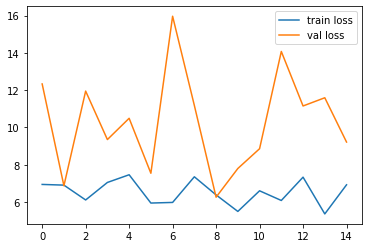

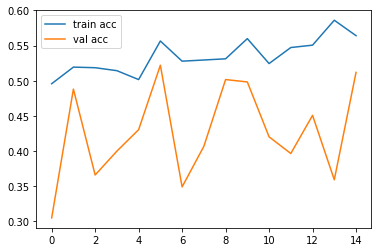

In [11]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:




# train_path = 'Datasets/Train'
# valid_path = 'Datasets/Test'

  
#   # useful for getting number of classes
# folders = glob('Datasets/Train/*')
  


# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory('Datasets/Train',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

# test_set = test_datagen.flow_from_directory('Datasets/Test',
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

# '''r=model.fit_generator(training_set,
#                          samples_per_epoch = 8000,
#                          nb_epoch = 5,
#                          validation_data = test_set,
#                          nb_val_samples = 2000)'''

# # fit the model
# r = model.fit_generator(
#   training_set,
#   validation_data=test_set,
#   epochs=5,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )
# # loss
# plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # accuracies
# plt.plot(r.history['acc'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

# import tensorflow as tf

# from keras.models import load_model

# model.save('facefeatures_new_model.h5')